In [34]:
from requests import get
from bs4 import BeautifulSoup
import os
import pandas as pd

- The goal is to automate the process to get the top 25 repos for 4 different languages 

In [138]:
# option for period is 
# daily, weekly, monthly

# enhancing the function to take a list of language and timeline as input and return lists of url and
# and a list of language

def get_top_repo(language_list, timeline):
    repo_links = []
    language=[]
    for element in language_list:
        
        url = f'https://github.com/trending/{element}?since={timeline}&spoken_language_code=en'
        response = get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        h1s = soup.find_all('h1', class_ = 'h3 lh-condensed')
        
        
        for elem  in h1s:
            repo_name = elem.get_text()
            repo_name = repo_name.replace('\n', '')
            repo_name = repo_name.replace(' ', '')
            links = 'https://github.com/' + repo_name
            repo_links.append(links)
            item= element
            language.append(item)
    df = pd.DataFrame(repo_links, language).reset_index().rename(columns = {'index': 'language',
                                                                           0:'link'})
            
        
    return df
    

In [139]:
# lets see of our function works

df1= get_top_repo(['python','swift', 'java', 'javascript'], 'weekly')

In [186]:
df1.head()

,language,link
0,python,https://github.com/microsoft/Bringing-Old-Phot...
1,python,https://github.com/corpnewt/gibMacOS
2,python,https://github.com/Rudrabha/Wav2Lip
3,python,https://github.com/PyTorchLightning/pytorch-li...
4,python,https://github.com/ytdl-org/youtube-dl


In [187]:
# getting the list of links
links = list(df1.link)
links

['https://github.com/microsoft/Bringing-Old-Photos-Back-to-Life',
 'https://github.com/corpnewt/gibMacOS',
 'https://github.com/Rudrabha/Wav2Lip',
 'https://github.com/PyTorchLightning/pytorch-lightning',
 'https://github.com/ytdl-org/youtube-dl',
 'https://github.com/Asabeneh/30-Days-Of-Python',
 'https://github.com/natewong1313/bird-bot',
 'https://github.com/public-apis/public-apis',
 'https://github.com/munki/macadmin-scripts',
 'https://github.com/facebookresearch/pifuhd',
 'https://github.com/kholia/OSX-KVM',
 'https://github.com/Hari-Nagarajan/nvidia-bot',
 'https://github.com/numpy/numpy',
 'https://github.com/mitre/caldera',
 'https://github.com/tensorflow/models',
 'https://github.com/alirezamika/autoscraper',
 'https://github.com/trekhleb/learn-python',
 'https://github.com/microsoft/DeepSpeed',
 'https://github.com/ultralytics/yolov5',
 'https://github.com/danielgatis/rembg',
 'https://github.com/eriklindernoren/PyTorch-GAN',
 'https://github.com/MrMimic/data-scientist-road

In [143]:
# creating a function that automates the parsing process given a list of links to parse

def get_content_df(links):
    '''Takes in a list of urs and parses through everyone of them and get the content of 
    that we need'''
    
    content = []
    for elem in links:
        url = elem
        response = get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        article = soup.find('article', itemprop = 'text')
        article_text = article.get_text()
        item = {
        'content': article_text
        }
        content.append(item)
        df = pd.DataFrame(content)
    return df

    

In [144]:
# checking if our function works
df = get_content_df(links)
df

,content
0,Old Photo Restoration (Official PyTorch Implem...
1,Py2/py3 script that can download macOS compone...
2,Wav2Lip: Accurately Lip-syncing Videos In The ...
3,\n\nThe lightweight PyTorch wrapper for high-p...
4,\nyoutube-dl - download videos from youtube.co...
...,...
95,\n\n\n\n\nreNgine\n\n\n\n\n\n\n\n\n\n An au...
96,🏛️ 22120 \n🏛️ - An archivist browser contro...
97,\n\n\nMaterial-UI\n\nReact components for fast...
98,"\n\n\n\n\nBootstrap\n\n Sleek, intuitive, and..."


In [145]:
# creating a final df 
final_df = pd.concat([df1, df], axis = 1)

In [154]:
# checking our final df
final_df

,language,link,content
0,python,https://github.com/microsoft/Bringing-Old-Phot...,Old Photo Restoration (Official PyTorch Implem...
1,python,https://github.com/corpnewt/gibMacOS,Py2/py3 script that can download macOS compone...
2,python,https://github.com/Rudrabha/Wav2Lip,Wav2Lip: Accurately Lip-syncing Videos In The ...
3,python,https://github.com/PyTorchLightning/pytorch-li...,\n\nThe lightweight PyTorch wrapper for high-p...
4,python,https://github.com/ytdl-org/youtube-dl,\nyoutube-dl - download videos from youtube.co...
...,...,...,...
95,javascript,https://github.com/yogeshojha/rengine,\n\n\n\n\nreNgine\n\n\n\n\n\n\n\n\n\n An au...
96,javascript,https://github.com/c9fe/22120,🏛️ 22120 \n🏛️ - An archivist browser contro...
97,javascript,https://github.com/mui-org/material-ui,\n\n\nMaterial-UI\n\nReact components for fast...
98,javascript,https://github.com/twbs/bootstrap,"\n\n\n\n\nBootstrap\n\n Sleek, intuitive, and..."


In [155]:
import unicodedata
import re
import json

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

import pandas as pd



In [166]:
def clean_content(content_list):
    clean_content = []
    for item in content_list:
        article = unicodedata.normalize('NFKD', item)\
        .encode('ascii', 'ignore')\
        .decode('utf-8', 'ignore')
        article = article.replace('\n', '')
        article = article.lower()
        clean_content.append(article)
    return clean_content
    

In [167]:
content_list = list(final_df.content)

clean = clean_content(content_list)

In [168]:
final_df['clean_content'] = clean

In [169]:
final_df

,language,link,content,clean_content
0,python,https://github.com/microsoft/Bringing-Old-Phot...,Old Photo Restoration (Official PyTorch Implem...,old photo restoration (official pytorch implem...
1,python,https://github.com/corpnewt/gibMacOS,Py2/py3 script that can download macOS compone...,py2/py3 script that can download macos compone...
2,python,https://github.com/Rudrabha/Wav2Lip,Wav2Lip: Accurately Lip-syncing Videos In The ...,wav2lip: accurately lip-syncing videos in the ...
3,python,https://github.com/PyTorchLightning/pytorch-li...,\n\nThe lightweight PyTorch wrapper for high-p...,the lightweight pytorch wrapper for high-perfo...
4,python,https://github.com/ytdl-org/youtube-dl,\nyoutube-dl - download videos from youtube.co...,youtube-dl - download videos from youtube.com ...
...,...,...,...,...
95,javascript,https://github.com/yogeshojha/rengine,\n\n\n\n\nreNgine\n\n\n\n\n\n\n\n\n\n An au...,rengine an automated recon framework for we...
96,javascript,https://github.com/c9fe/22120,🏛️ 22120 \n🏛️ - An archivist browser contro...,22120 - an archivist browser controller t...
97,javascript,https://github.com/mui-org/material-ui,\n\n\nMaterial-UI\n\nReact components for fast...,material-uireact components for faster and sim...
98,javascript,https://github.com/twbs/bootstrap,"\n\n\n\n\nBootstrap\n\n Sleek, intuitive, and...","bootstrap sleek, intuitive, and powerful fron..."


In [243]:
def get_content_df(links):
    '''Takes in a list of urs and parses through everyone of them and get the content of     that we need'''
    content = []
    watchers = []
    stars = []
    forks = []
    
    for elem in links:
        counts = []
        url = elem    
        response = get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        article = soup.find('article', itemprop = 'text')
        article_text = article.get_text()
        item = {        'content': article_text
               }        
        content.append(item)
        text = soup.find_all('a', class_='social-count')
        # so for every h in text within an element, we
        for h in text:
            #['watchers','stars','forks']
            counts.append(h.get_text().replace('\n','').replace(' ',''))
        
        watchers.append(counts[0])
        stars.append(counts[1])
        forks.append(counts[2])
   
  

    df = pd.DataFrame(content)
    df['watchers'] = watchers  
    df['stars'] = stars
    df['forks'] = forks        
    return df

In [247]:
# df = get_content_df(links)

In [248]:
df

,content,watchers,stars,forks
0,Old Photo Restoration (Official PyTorch Implem...,169,4.2k,277
1,Py2/py3 script that can download macOS compone...,109,2.6k,356
2,Wav2Lip: Accurately Lip-syncing Videos In The ...,59,1.6k,254
3,\n\nThe lightweight PyTorch wrapper for high-p...,215,10.3k,1.2k
4,\nyoutube-dl - download videos from youtube.co...,2.1k,79.8k,1.6k
...,...,...,...,...
95,\n\n\n\n\nreNgine\n\n\n\n\n\n\n\n\n\n An au...,93,2.1k,299
96,🏛️ 22120 \n🏛️ - An archivist browser contro...,35,2.2k,75
97,\n\n\nMaterial-UI\n\nReact components for fast...,1.4k,62.6k,19.1k
98,"\n\n\n\n\nBootstrap\n\n Sleek, intuitive, and...",7.1k,145k,71.1k


In [251]:
# final_df.drop(columns = 'content', inplace = True)

In [252]:

# df1 = pd.concat([df,final_df], axis = 1)

,content,watchers,stars,forks,language,link,clean_content
0,Old Photo Restoration (Official PyTorch Implem...,169,4.2k,277,python,https://github.com/microsoft/Bringing-Old-Phot...,old photo restoration (official pytorch implem...
1,Py2/py3 script that can download macOS compone...,109,2.6k,356,python,https://github.com/corpnewt/gibMacOS,py2/py3 script that can download macos compone...
2,Wav2Lip: Accurately Lip-syncing Videos In The ...,59,1.6k,254,python,https://github.com/Rudrabha/Wav2Lip,wav2lip: accurately lip-syncing videos in the ...
3,\n\nThe lightweight PyTorch wrapper for high-p...,215,10.3k,1.2k,python,https://github.com/PyTorchLightning/pytorch-li...,the lightweight pytorch wrapper for high-perfo...
4,\nyoutube-dl - download videos from youtube.co...,2.1k,79.8k,1.6k,python,https://github.com/ytdl-org/youtube-dl,youtube-dl - download videos from youtube.com ...
...,...,...,...,...,...,...,...
95,\n\n\n\n\nreNgine\n\n\n\n\n\n\n\n\n\n An au...,93,2.1k,299,javascript,https://github.com/yogeshojha/rengine,rengine an automated recon framework for we...
96,🏛️ 22120 \n🏛️ - An archivist browser contro...,35,2.2k,75,javascript,https://github.com/c9fe/22120,22120 - an archivist browser controller t...
97,\n\n\nMaterial-UI\n\nReact components for fast...,1.4k,62.6k,19.1k,javascript,https://github.com/mui-org/material-ui,material-uireact components for faster and sim...
98,"\n\n\n\n\nBootstrap\n\n Sleek, intuitive, and...",7.1k,145k,71.1k,javascript,https://github.com/twbs/bootstrap,"bootstrap sleek, intuitive, and powerful fron..."


In [254]:
# df1.to_csv('nlp-data.csv')

In [255]:
df1

,content,watchers,stars,forks,language,link,clean_content
0,Old Photo Restoration (Official PyTorch Implem...,169,4.2k,277,python,https://github.com/microsoft/Bringing-Old-Phot...,old photo restoration (official pytorch implem...
1,Py2/py3 script that can download macOS compone...,109,2.6k,356,python,https://github.com/corpnewt/gibMacOS,py2/py3 script that can download macos compone...
2,Wav2Lip: Accurately Lip-syncing Videos In The ...,59,1.6k,254,python,https://github.com/Rudrabha/Wav2Lip,wav2lip: accurately lip-syncing videos in the ...
3,\n\nThe lightweight PyTorch wrapper for high-p...,215,10.3k,1.2k,python,https://github.com/PyTorchLightning/pytorch-li...,the lightweight pytorch wrapper for high-perfo...
4,\nyoutube-dl - download videos from youtube.co...,2.1k,79.8k,1.6k,python,https://github.com/ytdl-org/youtube-dl,youtube-dl - download videos from youtube.com ...
...,...,...,...,...,...,...,...
95,\n\n\n\n\nreNgine\n\n\n\n\n\n\n\n\n\n An au...,93,2.1k,299,javascript,https://github.com/yogeshojha/rengine,rengine an automated recon framework for we...
96,🏛️ 22120 \n🏛️ - An archivist browser contro...,35,2.2k,75,javascript,https://github.com/c9fe/22120,22120 - an archivist browser controller t...
97,\n\n\nMaterial-UI\n\nReact components for fast...,1.4k,62.6k,19.1k,javascript,https://github.com/mui-org/material-ui,material-uireact components for faster and sim...
98,"\n\n\n\n\nBootstrap\n\n Sleek, intuitive, and...",7.1k,145k,71.1k,javascript,https://github.com/twbs/bootstrap,"bootstrap sleek, intuitive, and powerful fron..."


## Prepare Phase

In [256]:
def clean_content(content_list):
    clean_content = []
    for item in content_list:
        article = unicodedata.normalize('NFKD', item)\
        .encode('ascii', 'ignore')\
        .decode('utf-8', 'ignore')
        article = article.replace('\n', '')
        article = article.lower()
        article = re.sub(r'[^a-z0-9\s]', '', article)
        clean_content.append(article)
    return clean_content

In [257]:
def tokenizing(content_list):
    tokenize_content = []
    tokenizer = nltk.tokenize.ToktokTokenizer()
    for item in content_list:
        article = tokenizer.tokenize(item, return_str = True)
        tokenize_content.append(article)
    return tokenize_content
        
    

In [268]:
content_list = df1.content


In [269]:
df1['clean'] = clean_content(content_list)

In [270]:
df1['tokenized'] = tokenizing(df1.clean)

In [438]:
df1.head()

,content,watchers,stars,forks,language,link,clean_content,clean,tokenized,stemmed,lemmatized,filtered,word_list,doc_length,bigrams,trigrams
0,Old Photo Restoration (Official PyTorch Implem...,169,4.2k,277,python,https://github.com/microsoft/Bringing-Old-Phot...,old photo restoration (official pytorch implem...,old photo restoration official pytorch impleme...,old photo restoration official pytorch impleme...,old photo restor offici pytorch implementation...,old photo restoration official pytorch impleme...,old photo restoration official pytorch impleme...,"[old, photo, restoration, official, pytorch, i...",533,"[(old, photo), (photo, restoration), (restorat...","[(old, photo, restoration), (photo, restoratio..."
1,Py2/py3 script that can download macOS compone...,109,2.6k,356,python,https://github.com/corpnewt/gibMacOS,py2/py3 script that can download macos compone...,py2py3 script that can download macos componen...,py2py3 script that can download macos componen...,py2py3 script that can download maco compon di...,py2py3 script that can download macos componen...,py2py3 script download macos component direct ...,"[py2py3, script, that, can, download, macos, c...",43,"[(py2py3, script), (script, that), (that, can)...","[(py2py3, script, that), (script, that, can), ..."
2,Wav2Lip: Accurately Lip-syncing Videos In The ...,59,1.6k,254,python,https://github.com/Rudrabha/Wav2Lip,wav2lip: accurately lip-syncing videos in the ...,wav2lip accurately lipsyncing videos in the wi...,wav2lip accurately lipsyncing videos in the wi...,wav2lip accur lipsync video in the wildthi cod...,wav2lip accurately lipsyncing video in the wil...,wav2lip accurately lipsyncing video wildthis c...,"[wav2lip, accurately, lipsyncing, video, in, t...",972,"[(wav2lip, accurately), (accurately, lipsyncin...","[(wav2lip, accurately, lipsyncing), (accuratel..."
3,\n\nThe lightweight PyTorch wrapper for high-p...,215,10.3k,1.2k,python,https://github.com/PyTorchLightning/pytorch-li...,the lightweight pytorch wrapper for high-perfo...,the lightweight pytorch wrapper for highperfor...,the lightweight pytorch wrapper for highperfor...,the lightweight pytorch wrapper for highperfor...,the lightweight pytorch wrapper for highperfor...,lightweight pytorch wrapper highperformance ai...,"[the, lightweight, pytorch, wrapper, for, high...",860,"[(the, lightweight), (lightweight, pytorch), (...","[(the, lightweight, pytorch), (lightweight, py..."
4,\nyoutube-dl - download videos from youtube.co...,2.1k,79.8k,1.6k,python,https://github.com/ytdl-org/youtube-dl,youtube-dl - download videos from youtube.com ...,youtubedl download videos from youtubecom or ...,youtubedl download videos from youtubecom or o...,youtubedl download video from youtubecom or ot...,youtubedl download video from youtubecom or ot...,youtubedl download video youtubecom video plat...,"[youtubedl, download, video, from, youtubecom,...",10608,"[(youtubedl, download), (download, video), (vi...","[(youtubedl, download, video), (download, vide..."


In [455]:
# changing the datatypes

df1.watchers=  df1.watchers.str.replace('.', '').str.replace('k','00').astype(int)

df1.stars = df1.stars.str.replace('.', '').str.replace('k','00').astype(int)

df1.forks = df1.forks.str.replace('.', '').str.replace('k','00').astype(int)

In [457]:
df1.head()

,content,watchers,stars,forks,language,link,clean_content,clean,tokenized,stemmed,lemmatized,filtered,word_list,doc_length,bigrams,trigrams
0,Old Photo Restoration (Official PyTorch Implem...,169,4200,277,python,https://github.com/microsoft/Bringing-Old-Phot...,old photo restoration (official pytorch implem...,old photo restoration official pytorch impleme...,old photo restoration official pytorch impleme...,old photo restor offici pytorch implementation...,old photo restoration official pytorch impleme...,old photo restoration official pytorch impleme...,"[old, photo, restoration, official, pytorch, i...",533,"[(old, photo), (photo, restoration), (restorat...","[(old, photo, restoration), (photo, restoratio..."
1,Py2/py3 script that can download macOS compone...,109,2600,356,python,https://github.com/corpnewt/gibMacOS,py2/py3 script that can download macos compone...,py2py3 script that can download macos componen...,py2py3 script that can download macos componen...,py2py3 script that can download maco compon di...,py2py3 script that can download macos componen...,py2py3 script download macos component direct ...,"[py2py3, script, that, can, download, macos, c...",43,"[(py2py3, script), (script, that), (that, can)...","[(py2py3, script, that), (script, that, can), ..."
2,Wav2Lip: Accurately Lip-syncing Videos In The ...,59,1600,254,python,https://github.com/Rudrabha/Wav2Lip,wav2lip: accurately lip-syncing videos in the ...,wav2lip accurately lipsyncing videos in the wi...,wav2lip accurately lipsyncing videos in the wi...,wav2lip accur lipsync video in the wildthi cod...,wav2lip accurately lipsyncing video in the wil...,wav2lip accurately lipsyncing video wildthis c...,"[wav2lip, accurately, lipsyncing, video, in, t...",972,"[(wav2lip, accurately), (accurately, lipsyncin...","[(wav2lip, accurately, lipsyncing), (accuratel..."
3,\n\nThe lightweight PyTorch wrapper for high-p...,215,10300,1200,python,https://github.com/PyTorchLightning/pytorch-li...,the lightweight pytorch wrapper for high-perfo...,the lightweight pytorch wrapper for highperfor...,the lightweight pytorch wrapper for highperfor...,the lightweight pytorch wrapper for highperfor...,the lightweight pytorch wrapper for highperfor...,lightweight pytorch wrapper highperformance ai...,"[the, lightweight, pytorch, wrapper, for, high...",860,"[(the, lightweight), (lightweight, pytorch), (...","[(the, lightweight, pytorch), (lightweight, py..."
4,\nyoutube-dl - download videos from youtube.co...,2100,79800,1600,python,https://github.com/ytdl-org/youtube-dl,youtube-dl - download videos from youtube.com ...,youtubedl download videos from youtubecom or ...,youtubedl download videos from youtubecom or o...,youtubedl download video from youtubecom or ot...,youtubedl download video from youtubecom or ot...,youtubedl download video youtubecom video plat...,"[youtubedl, download, video, from, youtubecom,...",10608,"[(youtubedl, download), (download, video), (vi...","[(youtubedl, download, video), (download, vide..."


In [278]:
def stemming(content_list):
    stemmed = []
    ps = nltk.porter.PorterStemmer()
    for item in content_list:
        stems = [ps.stem(words) for words in item.split()]
        item_stemmed = ' '.join(stems)
        stemmed.append(item_stemmed)
    return stemmed

In [279]:
stemmed = stemming(df1.tokenized)

In [280]:
len(stemmed)

100

In [281]:
df1['stemmed'] = stemmed

In [311]:
df1.head()

,content,watchers,stars,forks,language,link,clean_content,clean,tokenized,stemmed,lemmatized,filtered
0,Old Photo Restoration (Official PyTorch Implem...,169,4.2k,277,python,https://github.com/microsoft/Bringing-Old-Phot...,old photo restoration (official pytorch implem...,old photo restoration official pytorch impleme...,old photo restoration official pytorch impleme...,old photo restor offici pytorch implementation...,old photo restoration official pytorch impleme...,old photo restoration official pytorch impleme...
1,Py2/py3 script that can download macOS compone...,109,2.6k,356,python,https://github.com/corpnewt/gibMacOS,py2/py3 script that can download macos compone...,py2py3 script that can download macos componen...,py2py3 script that can download macos componen...,py2py3 script that can download maco compon di...,py2py3 script that can download macos componen...,py2py3 script download macos component direct ...
2,Wav2Lip: Accurately Lip-syncing Videos In The ...,59,1.6k,254,python,https://github.com/Rudrabha/Wav2Lip,wav2lip: accurately lip-syncing videos in the ...,wav2lip accurately lipsyncing videos in the wi...,wav2lip accurately lipsyncing videos in the wi...,wav2lip accur lipsync video in the wildthi cod...,wav2lip accurately lipsyncing video in the wil...,wav2lip accurately lipsyncing video wildthis c...
3,\n\nThe lightweight PyTorch wrapper for high-p...,215,10.3k,1.2k,python,https://github.com/PyTorchLightning/pytorch-li...,the lightweight pytorch wrapper for high-perfo...,the lightweight pytorch wrapper for highperfor...,the lightweight pytorch wrapper for highperfor...,the lightweight pytorch wrapper for highperfor...,the lightweight pytorch wrapper for highperfor...,lightweight pytorch wrapper highperformance ai...
4,\nyoutube-dl - download videos from youtube.co...,2.1k,79.8k,1.6k,python,https://github.com/ytdl-org/youtube-dl,youtube-dl - download videos from youtube.com ...,youtubedl download videos from youtubecom or ...,youtubedl download videos from youtubecom or o...,youtubedl download video from youtubecom or ot...,youtubedl download video from youtubecom or ot...,youtubedl download video youtubecom video plat...


In [283]:
def lemmatizing(content_list):
    wnl = nltk.stem.WordNetLemmatizer()
    lemmatized = []
    for item in content_list:
        lemmas = [wnl.lemmatize(word) for word in item.split()]
        item_lemmatized = ' '.join(lemmas)
        lemmatized.append(item_lemmatized)
    return lemmatized

In [284]:
lemmatized = lemmatizing(df1.tokenized)

In [288]:
df1['lemmatized'] = lemmatized

In [312]:
df1.head()

,content,watchers,stars,forks,language,link,clean_content,clean,tokenized,stemmed,lemmatized,filtered
0,Old Photo Restoration (Official PyTorch Implem...,169,4.2k,277,python,https://github.com/microsoft/Bringing-Old-Phot...,old photo restoration (official pytorch implem...,old photo restoration official pytorch impleme...,old photo restoration official pytorch impleme...,old photo restor offici pytorch implementation...,old photo restoration official pytorch impleme...,old photo restoration official pytorch impleme...
1,Py2/py3 script that can download macOS compone...,109,2.6k,356,python,https://github.com/corpnewt/gibMacOS,py2/py3 script that can download macos compone...,py2py3 script that can download macos componen...,py2py3 script that can download macos componen...,py2py3 script that can download maco compon di...,py2py3 script that can download macos componen...,py2py3 script download macos component direct ...
2,Wav2Lip: Accurately Lip-syncing Videos In The ...,59,1.6k,254,python,https://github.com/Rudrabha/Wav2Lip,wav2lip: accurately lip-syncing videos in the ...,wav2lip accurately lipsyncing videos in the wi...,wav2lip accurately lipsyncing videos in the wi...,wav2lip accur lipsync video in the wildthi cod...,wav2lip accurately lipsyncing video in the wil...,wav2lip accurately lipsyncing video wildthis c...
3,\n\nThe lightweight PyTorch wrapper for high-p...,215,10.3k,1.2k,python,https://github.com/PyTorchLightning/pytorch-li...,the lightweight pytorch wrapper for high-perfo...,the lightweight pytorch wrapper for highperfor...,the lightweight pytorch wrapper for highperfor...,the lightweight pytorch wrapper for highperfor...,the lightweight pytorch wrapper for highperfor...,lightweight pytorch wrapper highperformance ai...
4,\nyoutube-dl - download videos from youtube.co...,2.1k,79.8k,1.6k,python,https://github.com/ytdl-org/youtube-dl,youtube-dl - download videos from youtube.com ...,youtubedl download videos from youtubecom or ...,youtubedl download videos from youtubecom or o...,youtubedl download video from youtubecom or ot...,youtubedl download video from youtubecom or ot...,youtubedl download video youtubecom video plat...


In [296]:
def remove_stopwords(content_list):
    no_stopwords = []
    stopword_list = stopwords.words('english')
    for item in content_list:
        words = item.split()
        filtered_words = [w for w in words if w not in stopword_list]
        article_without_stopwords = ' '.join(filtered_words)
        no_stopwords.append(article_without_stopwords)
    return no_stopwords

In [297]:
filtered = remove_stopwords(df1.lemmatized)

In [300]:
df1['filtered'] = filtered

In [313]:
df1.head()

,content,watchers,stars,forks,language,link,clean_content,clean,tokenized,stemmed,lemmatized,filtered
0,Old Photo Restoration (Official PyTorch Implem...,169,4.2k,277,python,https://github.com/microsoft/Bringing-Old-Phot...,old photo restoration (official pytorch implem...,old photo restoration official pytorch impleme...,old photo restoration official pytorch impleme...,old photo restor offici pytorch implementation...,old photo restoration official pytorch impleme...,old photo restoration official pytorch impleme...
1,Py2/py3 script that can download macOS compone...,109,2.6k,356,python,https://github.com/corpnewt/gibMacOS,py2/py3 script that can download macos compone...,py2py3 script that can download macos componen...,py2py3 script that can download macos componen...,py2py3 script that can download maco compon di...,py2py3 script that can download macos componen...,py2py3 script download macos component direct ...
2,Wav2Lip: Accurately Lip-syncing Videos In The ...,59,1.6k,254,python,https://github.com/Rudrabha/Wav2Lip,wav2lip: accurately lip-syncing videos in the ...,wav2lip accurately lipsyncing videos in the wi...,wav2lip accurately lipsyncing videos in the wi...,wav2lip accur lipsync video in the wildthi cod...,wav2lip accurately lipsyncing video in the wil...,wav2lip accurately lipsyncing video wildthis c...
3,\n\nThe lightweight PyTorch wrapper for high-p...,215,10.3k,1.2k,python,https://github.com/PyTorchLightning/pytorch-li...,the lightweight pytorch wrapper for high-perfo...,the lightweight pytorch wrapper for highperfor...,the lightweight pytorch wrapper for highperfor...,the lightweight pytorch wrapper for highperfor...,the lightweight pytorch wrapper for highperfor...,lightweight pytorch wrapper highperformance ai...
4,\nyoutube-dl - download videos from youtube.co...,2.1k,79.8k,1.6k,python,https://github.com/ytdl-org/youtube-dl,youtube-dl - download videos from youtube.com ...,youtubedl download videos from youtubecom or ...,youtubedl download videos from youtubecom or o...,youtubedl download video from youtubecom or ot...,youtubedl download video from youtubecom or ot...,youtubedl download video youtubecom video plat...


In [322]:
df1['word_list'] = df1.lemmatized.str.split()

In [324]:
df1.head()

,content,watchers,stars,forks,language,link,clean_content,clean,tokenized,stemmed,lemmatized,filtered,word_list
0,Old Photo Restoration (Official PyTorch Implem...,169,4.2k,277,python,https://github.com/microsoft/Bringing-Old-Phot...,old photo restoration (official pytorch implem...,old photo restoration official pytorch impleme...,old photo restoration official pytorch impleme...,old photo restor offici pytorch implementation...,old photo restoration official pytorch impleme...,old photo restoration official pytorch impleme...,"[old, photo, restoration, official, pytorch, i..."
1,Py2/py3 script that can download macOS compone...,109,2.6k,356,python,https://github.com/corpnewt/gibMacOS,py2/py3 script that can download macos compone...,py2py3 script that can download macos componen...,py2py3 script that can download macos componen...,py2py3 script that can download maco compon di...,py2py3 script that can download macos componen...,py2py3 script download macos component direct ...,"[py2py3, script, that, can, download, macos, c..."
2,Wav2Lip: Accurately Lip-syncing Videos In The ...,59,1.6k,254,python,https://github.com/Rudrabha/Wav2Lip,wav2lip: accurately lip-syncing videos in the ...,wav2lip accurately lipsyncing videos in the wi...,wav2lip accurately lipsyncing videos in the wi...,wav2lip accur lipsync video in the wildthi cod...,wav2lip accurately lipsyncing video in the wil...,wav2lip accurately lipsyncing video wildthis c...,"[wav2lip, accurately, lipsyncing, video, in, t..."
3,\n\nThe lightweight PyTorch wrapper for high-p...,215,10.3k,1.2k,python,https://github.com/PyTorchLightning/pytorch-li...,the lightweight pytorch wrapper for high-perfo...,the lightweight pytorch wrapper for highperfor...,the lightweight pytorch wrapper for highperfor...,the lightweight pytorch wrapper for highperfor...,the lightweight pytorch wrapper for highperfor...,lightweight pytorch wrapper highperformance ai...,"[the, lightweight, pytorch, wrapper, for, high..."
4,\nyoutube-dl - download videos from youtube.co...,2.1k,79.8k,1.6k,python,https://github.com/ytdl-org/youtube-dl,youtube-dl - download videos from youtube.com ...,youtubedl download videos from youtubecom or ...,youtubedl download videos from youtubecom or o...,youtubedl download video from youtubecom or ot...,youtubedl download video from youtubecom or ot...,youtubedl download video youtubecom video plat...,"[youtubedl, download, video, from, youtubecom,..."


In [349]:
python_words = ' '.join(df1[df1.language == 'python'].filtered)
java_words = ' '.join(df1[df1.language == 'java'].filtered)
javascript_words = ' '.join(df1[df1.language == 'javascript'].filtered)
swift_words = ' '.join(df1[df1.language == 'swift'].filtered)
all_words = ' '.join(df1.filtered)

In [350]:
python_words = re.sub(r'\s.\s', '', python_words)
java_words = re.sub(r'\s.\s', '', java_words)
javascript_words = re.sub(r'\s.\s', '', javascript_words)
swift_words = re.sub(r'\s.\s', '', swift_words)
all_words = re.sub(r'\s.\s', '', all_words)

In [334]:
python_words[:1000]

'old photo restoration official pytorch implementationproject page paper cvpr version paper journal version pretrained model colab demobringing old photo back life cvpr2020 oralold photo restoration via deep latent space translation pami reviewziyu wan1bo zhang2dongdong chen3pan zhang4dong chen2jing liao1fang wen2 1city university hong kong 2microsoft research asia 3microsoft cloud ai 4ustcnewyou play colab try photosrequirementthe code tested ubuntu nvidia gpus cuda installed python36 required run codeinstallationclone synchronizedbatchnormpytorch repository forcd faceenhancementmodelsnetworksgit clone httpsgithubcomvacancysynchronizedbatchnormpytorchcp rf synchronizedbatchnormpytorchsyncbatchnorm cd cd globaldetectionmodelsgit clone httpsgithubcomvacancysynchronizedbatchnormpytorchcp rf synchronizedbatchnormpytorchsyncbatchnorm cd download landmark detection pretrained modelcd facedetectionwget httpdlibnetfilesshapepredictor68facelandmarksdatbz2bzip2 shapepredictor68facelandmarksdatb

In [351]:
python_words_freq = pd.Series(python_words.split()).value_counts()
java_words_freq = pd.Series(java_words.split()).value_counts()
javascript_words_freq = pd.Series(javascript_words.split()).value_counts()
swift_words_freq = pd.Series(swift_words.split()).value_counts()
all_words_freq = pd.Series(all_words.split()).value_counts()

In [342]:
swift_words_freq

io                        718
swift                     649
library                   454
framework                 415
use                       347
                         ... 
tangram                     1
inspiration                 1
usersskylab                 1
instagramsnowflake          1
authenticatorspoly1305      1
Length: 12416, dtype: int64

In [343]:
javascript_words_freq

mac                 109
app                  91
free                 86
file                 79
tool                 78
                   ... 
accomplished          1
purposesonly          1
startedupgrading      1
fetchingsee           1
tried                 1
Length: 6241, dtype: int64

In [344]:
java_words_freq

service                       60
test                          57
use                           53
project                       53
using                         47
                              ..
issueopen                      1
cpathtoframeworkbenchmarks     1
manages                        1
goand                          1
increasing                     1
Length: 3787, dtype: int64

In [345]:
python_words_freq

video                                              189
code                                               153
file                                               150
use                                                149
model                                              145
                                                  ... 
volumesexternaldiskmakefirmwareupdaterpkgshthis      1
richard                                              1
pageviews                                            1
deeply                                               1
increasing                                           1
Length: 8652, dtype: int64

In [360]:
word_count = (pd.concat([all_words_freq, python_words_freq, java_words_freq, javascript_words_freq, swift_words_freq], axis=1, sort=True)
               .set_axis(['all','python', 'java', 'javascript', 'swift'], axis=1, inplace=False)
               .fillna(0)
               .apply(lambda s: s.astype(int))
              )



In [361]:
word_count.sort_values(by = 'javascript', ascending = False).head(75)

,all,python,java,javascript,swift
mac,136,5,0,109,22
app,325,3,17,91,214
free,142,21,3,86,32
file,491,150,26,79,236
tool,231,13,11,78,129
...,...,...,...,...,...
native,92,6,5,24,57
system,131,26,30,24,51
work,152,56,11,24,61
license,78,12,18,24,24


In [364]:
word_count[(word_count.python == 0)& (word_count.java == 0) & (word_count.javascript == 0)]

,all,python,java,javascript,swift
0000,2,0,0,0,2
0013swift,1,0,0,0,1
010203build,1,0,0,0,1
01022016note,1,0,0,0,1
0120swift,1,0,0,0,1
...,...,...,...,...,...
zipping,3,0,0,0,3
zocial,1,0,0,0,1
zola,1,0,0,0,1
zoomin,1,0,0,0,1


In [365]:
# lets get the doc length in each observations
df1['doc_length'] = [len(wordlist) for wordlist in df1.word_list]

In [366]:
df1

,content,watchers,stars,forks,language,link,clean_content,clean,tokenized,stemmed,lemmatized,filtered,word_list,doc_length
0,Old Photo Restoration (Official PyTorch Implem...,169,4.2k,277,python,https://github.com/microsoft/Bringing-Old-Phot...,old photo restoration (official pytorch implem...,old photo restoration official pytorch impleme...,old photo restoration official pytorch impleme...,old photo restor offici pytorch implementation...,old photo restoration official pytorch impleme...,old photo restoration official pytorch impleme...,"[old, photo, restoration, official, pytorch, i...",533
1,Py2/py3 script that can download macOS compone...,109,2.6k,356,python,https://github.com/corpnewt/gibMacOS,py2/py3 script that can download macos compone...,py2py3 script that can download macos componen...,py2py3 script that can download macos componen...,py2py3 script that can download maco compon di...,py2py3 script that can download macos componen...,py2py3 script download macos component direct ...,"[py2py3, script, that, can, download, macos, c...",43
2,Wav2Lip: Accurately Lip-syncing Videos In The ...,59,1.6k,254,python,https://github.com/Rudrabha/Wav2Lip,wav2lip: accurately lip-syncing videos in the ...,wav2lip accurately lipsyncing videos in the wi...,wav2lip accurately lipsyncing videos in the wi...,wav2lip accur lipsync video in the wildthi cod...,wav2lip accurately lipsyncing video in the wil...,wav2lip accurately lipsyncing video wildthis c...,"[wav2lip, accurately, lipsyncing, video, in, t...",972
3,\n\nThe lightweight PyTorch wrapper for high-p...,215,10.3k,1.2k,python,https://github.com/PyTorchLightning/pytorch-li...,the lightweight pytorch wrapper for high-perfo...,the lightweight pytorch wrapper for highperfor...,the lightweight pytorch wrapper for highperfor...,the lightweight pytorch wrapper for highperfor...,the lightweight pytorch wrapper for highperfor...,lightweight pytorch wrapper highperformance ai...,"[the, lightweight, pytorch, wrapper, for, high...",860
4,\nyoutube-dl - download videos from youtube.co...,2.1k,79.8k,1.6k,python,https://github.com/ytdl-org/youtube-dl,youtube-dl - download videos from youtube.com ...,youtubedl download videos from youtubecom or ...,youtubedl download videos from youtubecom or o...,youtubedl download video from youtubecom or ot...,youtubedl download video from youtubecom or ot...,youtubedl download video youtubecom video plat...,"[youtubedl, download, video, from, youtubecom,...",10608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,\n\n\n\n\nreNgine\n\n\n\n\n\n\n\n\n\n An au...,93,2.1k,299,javascript,https://github.com/yogeshojha/rengine,rengine an automated recon framework for we...,rengine an automated recon framework for we...,rengine an automated recon framework for web a...,rengin an autom recon framework for web applic...,rengine an automated recon framework for web a...,rengine automated recon framework web applicat...,"[rengine, an, automated, recon, framework, for...",597
96,🏛️ 22120 \n🏛️ - An archivist browser contro...,35,2.2k,75,javascript,https://github.com/c9fe/22120,22120 - an archivist browser controller t...,22120 an archivist browser controller th...,22120 an archivist browser controller that cac...,22120 an archivist browser control that cach e...,22120 an archivist browser controller that cac...,22120 archivist browser controller cache every...,"[22120, an, archivist, browser, controller, th...",1679
97,\n\n\nMaterial-UI\n\nReact components for fast...,1.4k,62.6k,19.1k,javascript,https://github.com/mui-org/material-ui,material-uireact components for faster and sim...,materialuireact components for faster and simp...,materialuireact components for faster and simp...,materialuireact compon for faster and simpler ...,materialuireact component for faster and simpl...,materialuireact component faster simpler web d...,"[materialuireact, component, for, faster, and,...",343
98,"\n\n\n\n\nBootstrap\n\n Sleek, intuitive, and...",7.1k,145k,71.1k,javasc

## Exploration Phase

In [367]:
import matplotlib.pyplot as plt
import seaborn as sns

In [369]:
plt.rc('figure', figsize = [12,12])

<AxesSubplot:xlabel='language', ylabel='doc_length'>

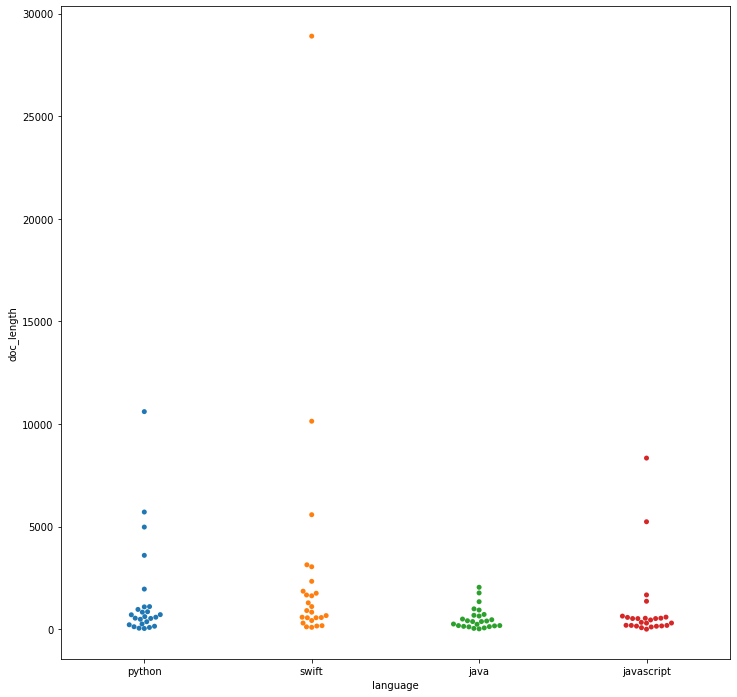

In [371]:
# lets see the doc length for different programming languages

sns.swarmplot(df1.language, df1.doc_length)

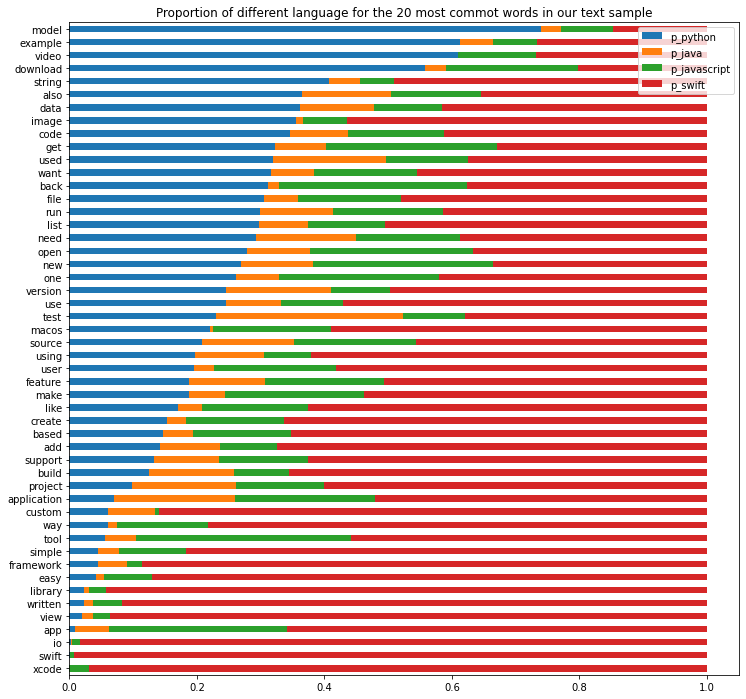

In [375]:
# lets plot the proportion of different languages amongst the top 50 occuring words

word_count.assign(p_python = word_count.python/word_count['all'],
                  p_java = word_count.java/word_count['all'],
                 p_javascript = word_count.javascript/word_count['all'],
                 p_swift = word_count.swift/word_count['all'],).sort_values(by = 'all')[['p_python', 'p_java', 'p_javascript', 'p_swift']]\
.tail(50).sort_values('p_python').plot.barh(stacked = True)
    
plt.title('Proportion of different language for the 20 most commot words in our text sample')
plt.show()

In [377]:
# lets create some word clouds

from wordcloud import WordCloud


In [383]:
# creating word cloud for all of the different programming languages

python_cloud = WordCloud(background_color = 'white', height = 1000, width = 1000).generate(python_words)

java_cloud = WordCloud(background_color = 'white', height = 1000, width = 1000).generate(java_words)

javascript_cloud = WordCloud(background_color = 'white', height = 1000, width = 1000).generate(javascript_words)

swift_cloud = WordCloud(background_color = 'white', height = 1000, width = 1000).generate(swift_words)


Text(0.5, 1.0, 'Swift Cloud')

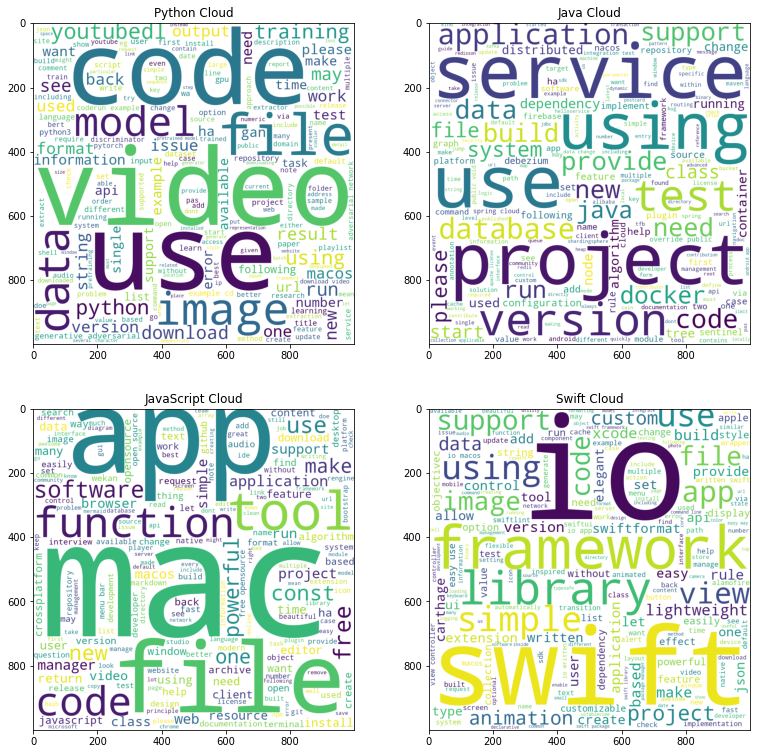

In [384]:
# plotting the word cloud

fig, axes = plt.subplots(2,2, figsize = (13,13))
axes[0,0].imshow(python_cloud)
axes[0,0].set_title('Python Cloud')

axes[0,1].imshow(java_cloud)
axes[0,1].set_title('Java Cloud')

axes[1,0].imshow(javascript_cloud)
axes[1,0].set_title('JavaScript Cloud')

axes[1,1].imshow(swift_cloud)
axes[1,1].set_title('Swift Cloud')

In [385]:
# lets create some bigrams and tri grams

df1['bigrams'] = [list(nltk.ngrams(wordlist, 2)) for wordlist in df1.word_list]

df1['trigrams'] = [list(nltk.ngrams(wordlist, 3)) for wordlist in df1.word_list]

In [387]:
df1.head()

,content,watchers,stars,forks,language,link,clean_content,clean,tokenized,stemmed,lemmatized,filtered,word_list,doc_length,bigrams,trigrams
0,Old Photo Restoration (Official PyTorch Implem...,169,4.2k,277,python,https://github.com/microsoft/Bringing-Old-Phot...,old photo restoration (official pytorch implem...,old photo restoration official pytorch impleme...,old photo restoration official pytorch impleme...,old photo restor offici pytorch implementation...,old photo restoration official pytorch impleme...,old photo restoration official pytorch impleme...,"[old, photo, restoration, official, pytorch, i...",533,"[(old, photo), (photo, restoration), (restorat...","[(old, photo, restoration), (photo, restoratio..."
1,Py2/py3 script that can download macOS compone...,109,2.6k,356,python,https://github.com/corpnewt/gibMacOS,py2/py3 script that can download macos compone...,py2py3 script that can download macos componen...,py2py3 script that can download macos componen...,py2py3 script that can download maco compon di...,py2py3 script that can download macos componen...,py2py3 script download macos component direct ...,"[py2py3, script, that, can, download, macos, c...",43,"[(py2py3, script), (script, that), (that, can)...","[(py2py3, script, that), (script, that, can), ..."
2,Wav2Lip: Accurately Lip-syncing Videos In The ...,59,1.6k,254,python,https://github.com/Rudrabha/Wav2Lip,wav2lip: accurately lip-syncing videos in the ...,wav2lip accurately lipsyncing videos in the wi...,wav2lip accurately lipsyncing videos in the wi...,wav2lip accur lipsync video in the wildthi cod...,wav2lip accurately lipsyncing video in the wil...,wav2lip accurately lipsyncing video wildthis c...,"[wav2lip, accurately, lipsyncing, video, in, t...",972,"[(wav2lip, accurately), (accurately, lipsyncin...","[(wav2lip, accurately, lipsyncing), (accuratel..."
3,\n\nThe lightweight PyTorch wrapper for high-p...,215,10.3k,1.2k,python,https://github.com/PyTorchLightning/pytorch-li...,the lightweight pytorch wrapper for high-perfo...,the lightweight pytorch wrapper for highperfor...,the lightweight pytorch wrapper for highperfor...,the lightweight pytorch wrapper for highperfor...,the lightweight pytorch wrapper for highperfor...,lightweight pytorch wrapper highperformance ai...,"[the, lightweight, pytorch, wrapper, for, high...",860,"[(the, lightweight), (lightweight, pytorch), (...","[(the, lightweight, pytorch), (lightweight, py..."
4,\nyoutube-dl - download videos from youtube.co...,2.1k,79.8k,1.6k,python,https://github.com/ytdl-org/youtube-dl,youtube-dl - download videos from youtube.com ...,youtubedl download videos from youtubecom or ...,youtubedl download videos from youtubecom or o...,youtubedl download video from youtubecom or ot...,youtubedl download video from youtubecom or ot...,youtubedl download video youtubecom video plat...,"[youtubedl, download, video, from, youtubecom,...",10608,"[(youtubedl, download), (download, video), (vi...","[(youtubedl, download, video), (download, vide..."


**Creating bigrams**

In [401]:
python_bigrams = pd.Series(list(nltk.ngrams(python_words.split(), 2))).value_counts().head(25)

java_bigrams = pd.Series(list(nltk.ngrams(java_words.split(), 2))).value_counts().head(25)

javascript_bigrams = pd.Series(list(nltk.ngrams(javascript_words.split(), 2))).value_counts().head(25)

swift_bigrams = pd.Series(list(nltk.ngrams(swift_words.split(), 2))).value_counts().head(25)

<AxesSubplot:>

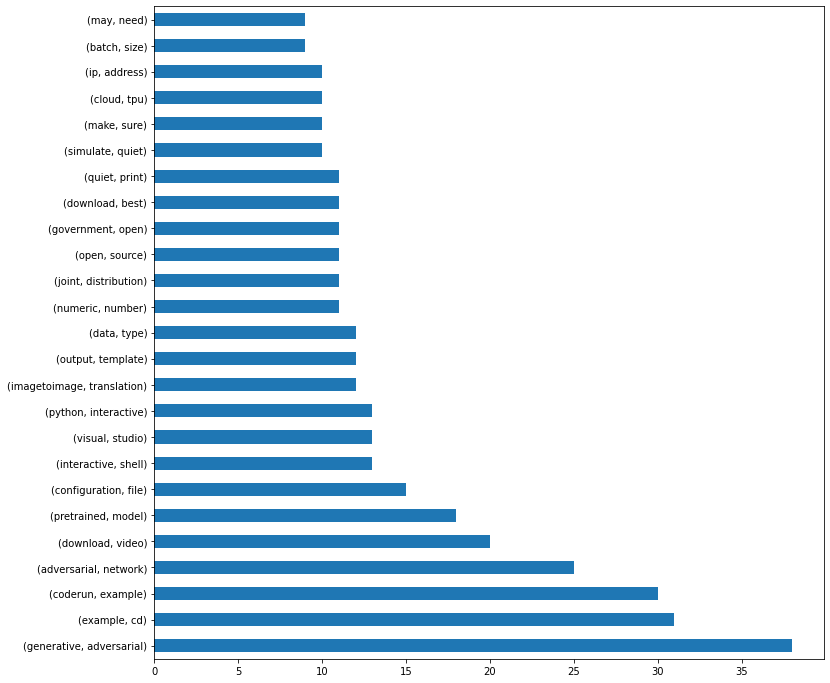

In [402]:
python_bigrams.plot(kind = 'barh')

<AxesSubplot:>

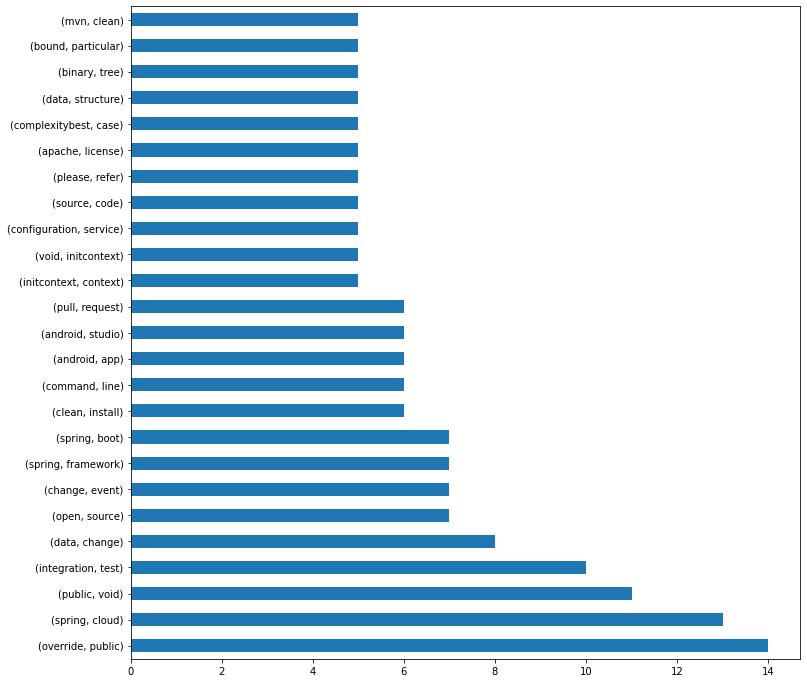

In [403]:
java_bigrams.plot(kind = 'barh')

<AxesSubplot:>

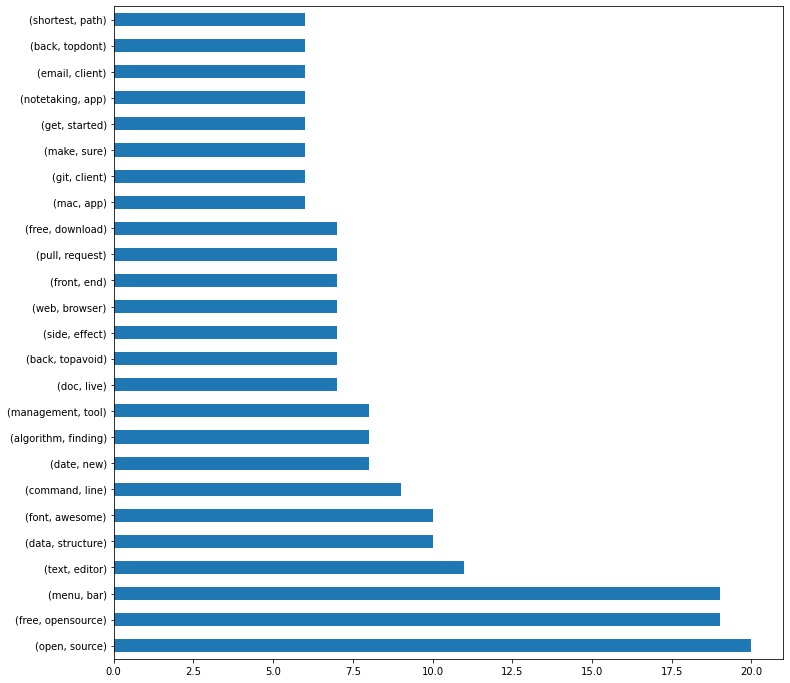

In [404]:
javascript_bigrams.plot(kind = 'barh')

<AxesSubplot:>

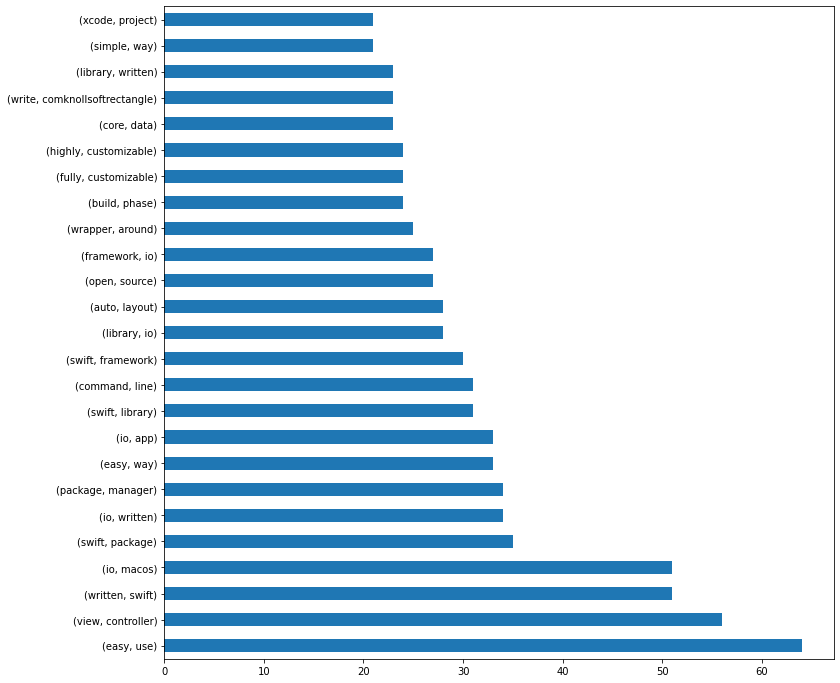

In [405]:
swift_bigrams.plot(kind = 'barh')

**Creating trigrams**

In [406]:
python_trigrams = pd.Series(list(nltk.ngrams(python_words.split(), 3))).value_counts().head(25)

java_trigrams = pd.Series(list(nltk.ngrams(java_words.split(), 3))).value_counts().head(25)

javascript_trigrams = pd.Series(list(nltk.ngrams(javascript_words.split(), 3))).value_counts().head(25)

swift_trigrams = pd.Series(list(nltk.ngrams(swift_words.split(), 3))).value_counts().head(25)

<AxesSubplot:>

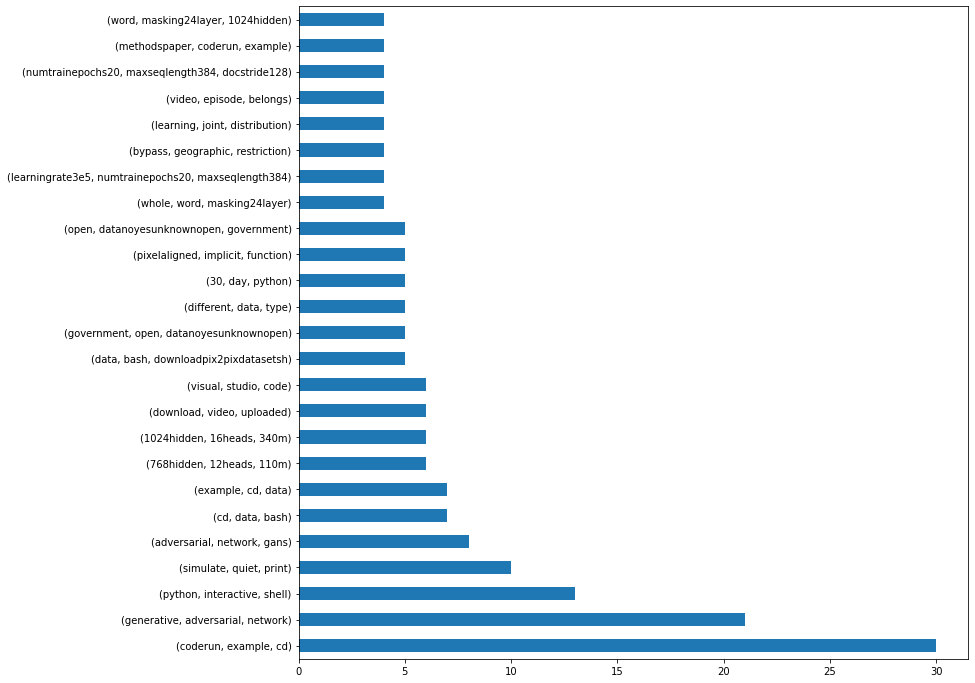

In [407]:
python_trigrams.plot(kind = 'barh')

<AxesSubplot:>

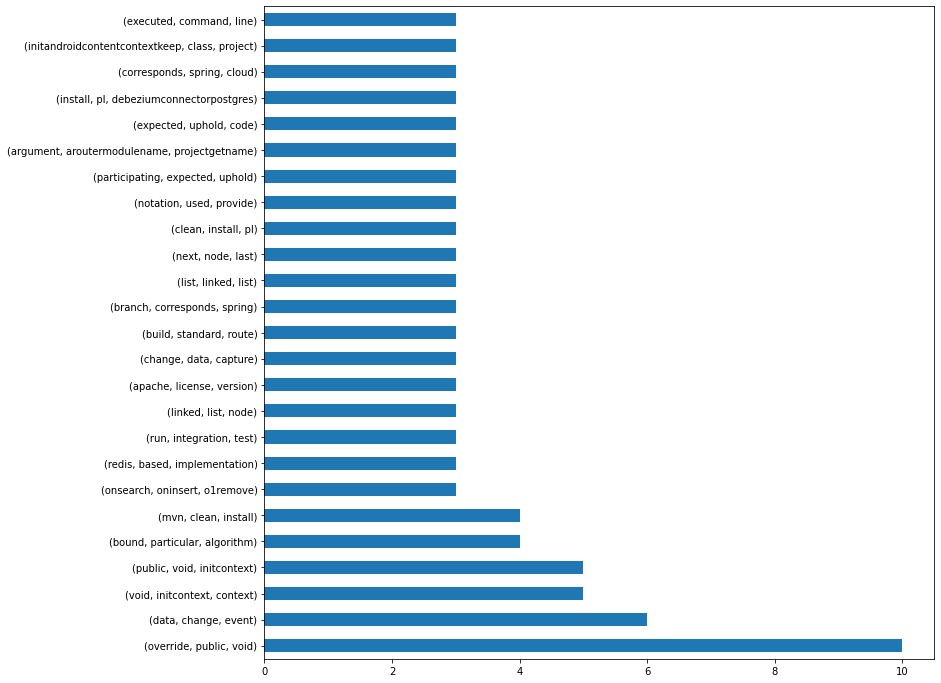

In [408]:
java_trigrams.plot(kind = 'barh')

<AxesSubplot:>

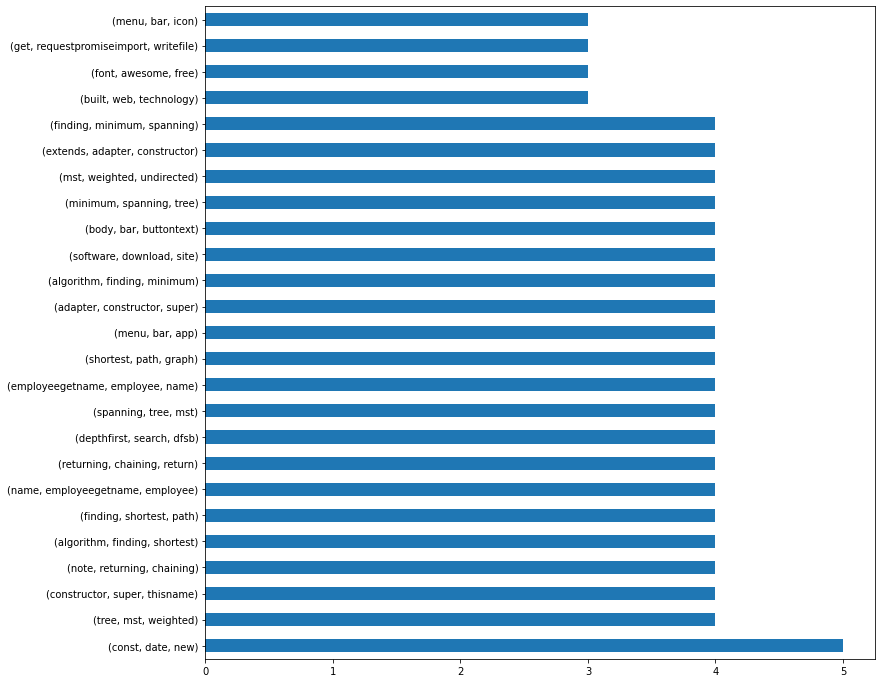

In [409]:
javascript_trigrams.plot(kind = 'barh')

<AxesSubplot:>

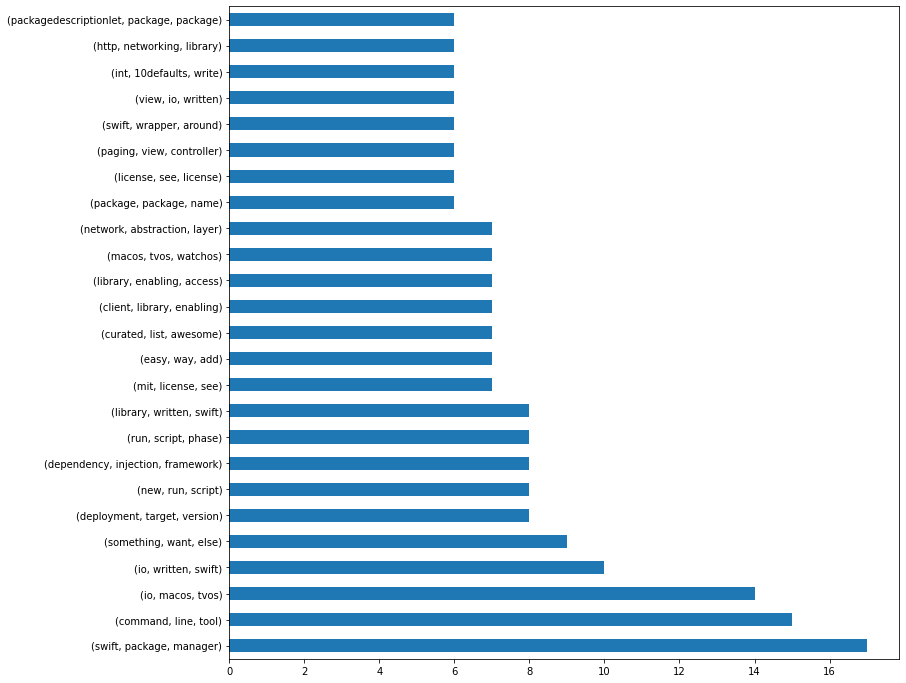

In [410]:
swift_trigrams.plot(kind = 'barh')

**Lets plot word cloud of bigrams and trigrams**

In [411]:
python_data = {k[0] + ' ' + k[1]: v for k, v in python_bigrams.to_dict().items()}
java_data = {k[0] + ' ' + k[1]: v for k, v in java_bigrams.to_dict().items()}
javascript_data = {k[0] + ' ' + k[1]: v for k, v in javascript_bigrams.to_dict().items()}
swift_data = {k[0] + ' ' + k[1]: v for k, v in swift_bigrams.to_dict().items()}


In [412]:
# creating the bigram cloud

cloud_python = WordCloud(background_color = 'white', height = 1000, width = 1000)\
                .generate_from_frequencies(python_data)


cloud_java = WordCloud(background_color = 'white', height = 1000, width = 1000).\
                generate_from_frequencies(java_data)


cloud_javascript = WordCloud(background_color = 'white', height = 1000, width = 1000).\
                generate_from_frequencies(javascript_data)


cloud_swift = WordCloud(background_color = 'white', height = 1000, width = 1000).\
                generate_from_frequencies(swift_data)

Text(0.5, 1.0, 'Swift Cloud Bigrams')

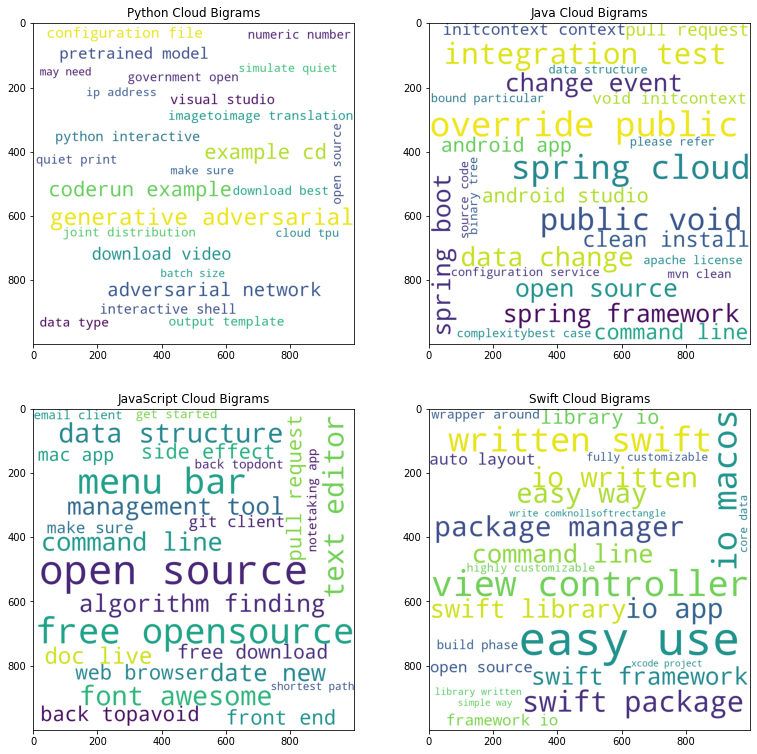

In [413]:
# plotting the bigram word cloud



fig, axes = plt.subplots(2,2, figsize = (13,13))
axes[0,0].imshow(cloud_python)
axes[0,0].set_title('Python Cloud Bigrams')

axes[0,1].imshow(cloud_java)
axes[0,1].set_title('Java Cloud Bigrams')

axes[1,0].imshow(cloud_javascript)
axes[1,0].set_title('JavaScript Cloud Bigrams')

axes[1,1].imshow(cloud_swift)
axes[1,1].set_title('Swift Cloud Bigrams')



## Modeling

In [414]:
import Prepare

In [417]:
# lets split our data to train and validate for further exploration

train,validate = Prepare.train_validate(df1)


train percent:  68.0 , validate percent:  32.0


In [418]:
train.head()

,content,watchers,stars,forks,language,link,clean_content,clean,tokenized,stemmed,lemmatized,filtered,word_list,doc_length,bigrams,trigrams
33,The Composable Architecture\n\n\n\nThe Composa...,106,2.5k,198,swift,https://github.com/pointfreeco/swift-composabl...,the composable architecturethe composable arch...,the composable architecturethe composable arch...,the composable architecturethe composable arch...,the compos architectureth compos architectur t...,the composable architecturethe composable arch...,composable architecturethe composable architec...,"[the, composable, architecturethe, composable,...",3050,"[(the, composable), (composable, architecturet...","[(the, composable, architecturethe), (composab..."
69,\nDesign patterns implemented in Java\n\n\n\n\...,4k,62.1k,19.8k,java,https://github.com/iluwatar/java-design-patterns,design patterns implemented in javaintroductio...,design patterns implemented in javaintroductio...,design patterns implemented in javaintroductio...,design pattern implement in javaintroductionde...,design pattern implemented in javaintroduction...,design pattern implemented javaintroductiondes...,"[design, pattern, implemented, in, javaintrodu...",407,"[(design, pattern), (pattern, implemented), (i...","[(design, pattern, implemented), (pattern, imp..."
84,faker.js - generate massive amounts of fake da...,360,28k,2.4k,javascript,https://github.com/Marak/faker.js,faker.js - generate massive amounts of fake da...,fakerjs generate massive amounts of fake data...,fakerjs generate massive amounts of fake data ...,fakerj gener massiv amount of fake data in the...,fakerjs generate massive amount of fake data i...,fakerjs generate massive amount fake data brow...,"[fakerjs, generate, massive, amount, of, fake,...",526,"[(fakerjs, generate), (generate, massive), (ma...","[(fakerjs, generate, massive), (generate, mass..."
87,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n🥟 He...,12,96,70,javascript,https://github.com/ArugaZ/whatsapp-bot,"help me!trakteerini semua gratis, jangan peli...",help metrakteerini semua gratis jangan pelit ...,help metrakteerini semua gratis jangan pelit y...,help metrakteerini semua grati jangan pelit ya...,help metrakteerini semua gratis jangan pelit y...,help metrakteerini semua gratis jangan pelit y...,"[help, metrakteerini, semua, gratis, jangan, p...",199,"[(help, metrakteerini), (metrakteerini, semua)...","[(help, metrakteerini, semua), (metrakteerini,..."
95,\n\n\n\n\nreNgine\n\n\n\n\n\n\n\n\n\n An au...,93,2.1k,299,javascript,https://github.com/yogeshojha/rengine,rengine an automated recon framework for we...,rengine an automated recon framework for we...,rengine an automated recon framework for web a...,rengin an autom recon framework for web applic...,rengine an automated recon framework for web a...,rengine automated recon framework web applicat...,"[rengine, an, automated, recon, framework, for...",597,"[(rengine, an), (an, automated), (automated, r...","[(rengine, an, automated), (an, automated, rec..."


In [419]:
from sklearn.feature_extraction.text import CountVectorizer

In [464]:
vectorizer = CountVectorizer(stop_words='english', 
                             min_df=10, 
                             ngram_range=(1,2), 
                             binary=True)


vectorizer.fit(train.filtered)

vectorizer.get_feature_names()


In [424]:
bow = vectorizer.transform(train.filtered)
bow

<68x346 sparse matrix of type '<class 'numpy.int64'>'
	with 5659 stored elements in Compressed Sparse Row format>

In [463]:
bow_array = bow.toarray()
bow_array[0]

In [462]:
# Show sentences and vector space representation.
#  to visualize what's happening.
for i, v in zip(train.filtered, bow_array):
    print(i)
    print(v)

In [425]:
X_bow = bow

In [426]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', min_df=10, 
                             ngram_range=(1,2), 
                             binary=True)

tfidf_sparse_matrix = tfidf.fit_transform(train.filtered)
tfidf_sparse_matrix

<68x346 sparse matrix of type '<class 'numpy.float64'>'
	with 5659 stored elements in Compressed Sparse Row format>

In [427]:
pd.DataFrame(tfidf_sparse_matrix.todense(), columns=tfidf.get_feature_names())

,20,able,access,add,added,adding,additional,advanced,allows,andor,...,website,wiki,window,work,working,write,writing,xcode,youll,zip
0,0.000000,0.087809,0.074859,0.057496,0.0,0.087809,0.080682,0.074859,0.074859,0.00000,...,0.000000,0.000000,0.0,0.056482,0.0,0.087809,0.000000,0.082886,0.0,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.178952,0.0,0.115108,0.0,0.000000,0.000000,0.000000,0.0,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.14225,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.246769,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.0,0.146158,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.146158,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,0.236977,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.236977,0.000000,0.0,0.000000
64,0.000000,0.160514,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.143718,0.000000,0.0,0.103248,0.0,0.000000,0.000000,0.000000,0.0,0.000000
65,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.119329,0.110716,0.110716,0.00000,...,0.116280,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
66,0.000000,0.000000,0.000000,0.159172,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000


In [459]:
# Get vocabularies.
 tfidf.vocabulary_

In [460]:
# Transform to document-term matrix
vector_spaces = tfidf.transform(train.filtered)
vector_spaces.toarray()

In [461]:
# Show sentences and vector space representation.
# 
# (A, B) C
# A : Document Index
# B : Specific word-vector index
# C : TF-IDF score
for i, v in zip(train.filtered, vector_spaces):
    print(i)
    print(v)

In [431]:
X_tfidf = tfidf_sparse_matrix

In [432]:
y = train['language']

X_bow
X_tfidf

<68x346 sparse matrix of type '<class 'numpy.float64'>'
	with 5659 stored elements in Compressed Sparse Row format>

In [433]:
from sklearn.linear_model import LogisticRegression

lm = LogisticRegression().fit(X_bow, y)

train['predicted'] = lm.predict(X_bow)
# test['predicted'] = lm.predict(X_test)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [435]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(train.language, train.predicted)

array([[18,  0,  0,  0],
       [ 0, 16,  0,  0],
       [ 0,  0, 16,  0],
       [ 0,  0,  0, 18]])

In [436]:
pd.crosstab(train.language, train.predicted)


predicted,java,javascript,python,swift
language,,,,
java,18,0,0,0
javascript,0,16,0,0
python,0,0,16,0
swift,0,0,0,18


In [437]:
print(classification_report(train.language, train.predicted))


              precision    recall  f1-score   support

        java       1.00      1.00      1.00        18
  javascript       1.00      1.00      1.00        16
      python       1.00      1.00      1.00        16
       swift       1.00      1.00      1.00        18

    accuracy                           1.00        68
   macro avg       1.00      1.00      1.00        68
weighted avg       1.00      1.00      1.00        68

